# Sheet 7

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

ModuleNotFoundError: No module named 'torch'

## 2 Log-sum-exp and soft(arg)max
(b)

(100, 100, 2) (100, 100)
(100, 100, 2) (100, 100)
(100, 100, 2) (100, 100)


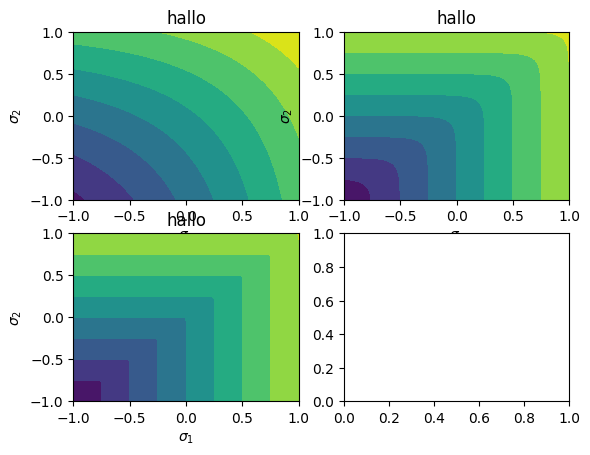

In [11]:
def logsumexp(x, lamb=1):
    # TODO: implement the logsumexp
    return 1/lamb*np.log(np.sum(np.exp(lamb*x), axis=-1))

# TODO: set up a grid of points in [-1, 1] x [-1, 1]
sigma1 = np.linspace(-1,1,100)
sigma2 = np.linspace(-1,1,100)
sigma = np.stack(np.meshgrid(sigma1, sigma2), axis=-1)


# TODO: I recommend you set up a function to set up an Axes object with the correct x, y labels, 
#       equal aspect and maybe x and y ticks.

def set_up_axes(ax, title):
    ax.title.set_text(title)
    ax.set_xlabel(r'$\sigma_1$')
    ax.set_ylabel(r'$\sigma_2$')

# TODO: calculate and plot the functions as specified in the task
fig, axs = plt.subplots(2,2)
positions = [(0,0),(0,1),(1,0)]
for i, lam in enumerate([1,10,100]):
    print(sigma.shape, logsumexp(sigma, lam).shape)
    im = axs[positions[i]].contourf(sigma1, sigma2, logsumexp(sigma,lam))
    #plt.xlabel(r'$\sigma_1$')
    #plt.ylabel(r'$\sigma_2$')
    #plt.title(f'Contour plot of lse($\sigma_1,\sigma_2;\lambda={lam})$')
    #plt.colorbar(im, cax=axs[positions[i]])
    set_up_axes(axs[positions[i]],'hallo')
    #plt.show()

#plt.contourf(sigma1, sigma2, np.max(sigma, axis=-1))
#plt.xlabel(r'$\sigma_1$')
#plt.ylabel(r'$\sigma_2$')
#plt.title(f'Contour plot of max($\sigma_1,\sigma_2)$')
#plt.colorbar()
plt.show()

(c)

(100, 2)


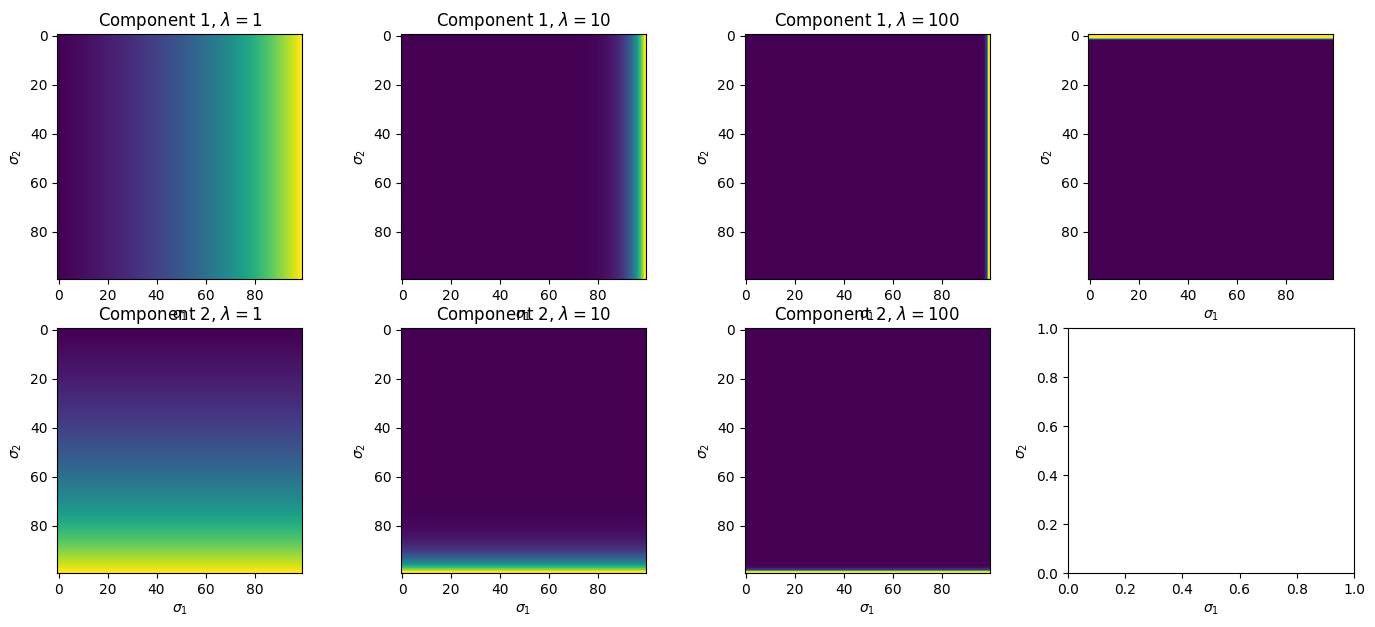

In [21]:
def softmax(x, axis, lamb=1):
    # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
    return np.exp(lamb*x)/np.sum(np.exp(lamb*x), axis=axis)

print(np.sum(sigma,axis=0).shape)
def to_onehot(x):
    ret = np.zeros(x.shape)
    ret[x] = 1
    return ret

xy = sigma
# TODO: compute the argmax of each gridpoint in one-hot form
onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)

# plot the softmax
fig, axs = plt.subplots(2, 4, figsize=(17, 7))
for row in axs:
    for ax in row:
        set_up_axes(ax, '')
#im = axs[0,0].imshow(softmax(sigma,0)[:,:,0])

for col,lam in enumerate([1,10,100]):
    axs[0,col].imshow(softmax(sigma,1,lam)[:,:,0])
    axs[0,col].title.set_text(f'Component 1, $\lambda={lam}$')
    axs[1,col].imshow(softmax(sigma,0,lam)[:,:,1])
    axs[1,col].title.set_text(f'Component 2, $\lambda={lam}$')
#set_up_axes(axs)
#plt.colorbar(im)
# plot the onehot argmax
axs[0,3].imshow(onehot_argmax)

(a)

In [ ]:
class Abs(nn.Module):
    """Absolute value activation function. You can experiment with this instead of ReLU."""
    def forward(self, x):
        return x.abs()
    
    
# define NN architecture.
class MLPShallow(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: initialize Linear Layers and the activation as specified on the sheet
        
        
    def forward(self, x):
        # TODO: pass the input x through the layers and return the output
    

(b)

In [ ]:
def visualize_model(model, res=500, bound=5):
    # TODO: implement a function that takes the model (the MLP), and builds a 
    #       grid of points in [-bound, bound] x [-bound, bound], passes them 
    #       through the model and returns the result in the shape of an image


# TODO: instantiate the model and make the visualizations as requested in the task
# NOTE: If you get a constant output, you got an unlucky initialization. Simply reinitialize the model.

(c)

In [ ]:
# TODO: compute the spatial gradient of the network outputs (as an image) from (b)
#       using np.gradient, and visualize using matplotlib's prism colormap


(d)

In [ ]:
# define NN architecture.
class MLPDeep(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: initialize Linear Layers and the activation as specified on the sheet
        
        
    def forward(self, x):
        # TODO: pass the input x through the layers and return the output

# TODO: repeat the visualizations from above
